In [1]:
import matplotlib.pyplot as plt
import numpy as np


from aart_func import *
import params
from params import * # The file params.py contains all the relevant parameters for the simulations
from astropy import units as u
import kgeo
import image_tools as tls
import subprocess
import scipy.interpolate
from scipy.interpolate import interp1d
import fileloading
import bigRunComputing
from matplotlib import ticker
from matplotlib.lines import Line2D

%load_ext autoreload
%autoreload 2
import importlib 
from functools import partial
import astroModels
import runDataClass
import classRunComputing
import subprocess
from matplotlib.patches import Circle
import kgeo
import numpy as np
from matplotlib import ticker


import EZPaths
import os

import astroPloting
import image_tools
from aart_func import *
from image_tools import curve_params
from params import *
import importlib
import params
import astroModels
import fileloading
from movieMakerV2 import movieMakerIntensity
import normalizingBrightparams
from astropy import units as u
import re

from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
from movieMakerV2 import intensityBlurr

Welcome to eht-imaging! v 1.2.7 



/home/td6241/anaconda3/envs/mural/lib/python3.12/site-packages/kgeo-0.0.1-py3.12.egg/kgeo/bfields.py:158: SyntaxWarning: invalid escape sequence '\m'
/home/td6241/anaconda3/envs/mural/lib/python3.12/site-packages/kgeo-0.0.1-py3.12.egg/kgeo/bfields.py:183: SyntaxWarning: invalid escape sequence '\m'
/home/td6241/anaconda3/envs/mural/lib/python3.12/site-packages/kgeo-0.0.1-py3.12.egg/kgeo/bfields.py:158: SyntaxWarning: invalid escape sequence '\m'
/home/td6241/anaconda3/envs/mural/lib/python3.12/site-packages/kgeo-0.0.1-py3.12.egg/kgeo/bfields.py:183: SyntaxWarning: invalid escape sequence '\m'


In [55]:
plt.rcParams.update({
    'font.size' : 14,                   # Set font size to 11pt
    'axes.labelsize': 14,               # -> axis labels
    'legend.fontsize': 12,              # -> legends
    'text.usetex': True,
    'text.latex.preamble': (            # LaTeX preamble
        r'\usepackage{lmodern}'
    ),
    'font.family': 'Latin Modern Roman',
})

In [35]:
xGHZ = np.array([22,22,43,24,43,43,86,86.8,129.3,93,221,221,230])*1e9

yJansky = np.array([1.12,1.01,.94,.88,.59,.65,.53,.93,.65,1.41,1.10,1.33,.5])
errJansky = np.array([0.11,0.10,0.09,0.09,0.06,0.06,0.1,0.09,0.2,0.07,0.11,0.07,0])
sortedyJansky = np.array([xs for _,xs in sorted(zip(xGHZ,yJansky))])
sortederrJansky  = np.array([xs for _,xs in sorted(zip(xGHZ,errJansky))])


yNuFNu = np.array([.246,.232,.404,.211,.254,.279,.458,.807,.84,1.31,2.43,2.94,1.15])*10e-12
errNuFNu = np.array([0.024,0.023,0.039,0.021,0.024,0.027,0.086,0.078,0.026,0.07,0.24,0.15,0])*10e-12
sortedflux = np.array([xs for _,xs in sorted(zip(xGHZ,yNuFNu ))])
yerrortedX  = np.array([xs for _,xs in sorted(zip(xGHZ,errNuFNu))])
x.sort()

In [14]:
print(errX.shape)

(13,)


In [48]:
np.logspace(-14,-9.5,8)

array([1.00000000e-14, 4.39397056e-14, 1.93069773e-13, 8.48342898e-13,
       3.72759372e-12, 1.63789371e-11, 7.19685673e-11, 3.16227766e-10])

In [55]:
1e2

100.0

In [74]:
yrange =np.array([10**-11.5])

In [32]:
model = runDataClass.SingleModelData(bigRun2.getSubPaths(),run2.getRunName(),"ModelA_61")
xvar = model["janksys_thick"]
print(xvar)

[[3.43758018e-01 1.05415967e-02 6.30402766e-04 3.44353693e-01]
 [7.24497085e-01 4.30911127e-02 2.50465880e-03 7.62660046e-01]
 [6.31591093e-01 4.47991432e-02 2.66991385e-03 6.76317914e-01]
 [5.62556891e-01 4.40140637e-02 2.65983763e-03 6.07876506e-01]
 [5.12019064e-01 4.28955809e-02 2.61898966e-03 5.56746247e-01]
 [4.73072108e-01 4.17684951e-02 2.57196342e-03 5.16906303e-01]
 [4.41788427e-01 4.07011942e-02 2.52500531e-03 4.84666213e-01]
 [4.15869611e-01 3.97060831e-02 2.47994240e-03 4.57803808e-01]
 [3.93884496e-01 3.87808387e-02 2.43725806e-03 4.34913705e-01]
 [3.74891118e-01 3.79193201e-02 2.39697729e-03 4.15061564e-01]
 [3.58240485e-01 3.71148426e-02 2.35896593e-03 3.97599010e-01]
 [3.43468400e-01 3.63611802e-02 2.32304163e-03 3.82059730e-01]
 [3.30232418e-01 3.56528248e-02 2.28901691e-03 3.68098193e-01]
 [3.18273293e-01 3.49849947e-02 2.25671551e-03 3.55451852e-01]
 [3.07390423e-01 3.43535628e-02 2.22597778e-03 3.43916912e-01]
 [2.97425652e-01 3.37549669e-02 2.19666152e-03 3.333322

In [5]:
def plotModel(ModelName:str, ax,bigRunVar,runVar,add_5=False):
    model = runDataClass.SingleModelData(bigRunVar.getSubPaths(),runVar.getRunName(),ModelName)
    xvar = model["x_variable"]
    if add_5:
        yvar = model["janksys_thick"][:,3] + .5
    else:
        yvar = model["janksys_thick"][:,3]
    ax.plot(xvar[xvar<=230e9],xvar[xvar<=230e9]*yvar[xvar<=230e9],label=ModelName)

In [6]:

run = runDataClass.exp1

bigRun = classRunComputing.BigRuns(
    run.getRunName(),
    run.getBrightparams(),
    run.getBPVarNames(),
    run.getGeoGrid(),
    run.getGeoGridNames(),
    normalized_brightparams=run.getIsNormalized(),
)

full_bp_dict = bigRun.createBrightParamsDict()


ModelA32 = runDataClass.SingleModelData(bigRun.getSubPaths(),run.getRunName(),"ModelA_32")


Subdirectory for storing all run results '/scratch/gpfs/td6241/aart/bigRuns/' already exist, doing nothing
Subdirectory for storing this run result '/scratch/gpfs/td6241/aart/bigRuns/exp1/' already exist, doing nothing
Subdirectory for images '/scratch/gpfs/td6241/aart/bigRuns/exp1/Images/' already exist, doing nothing
Subdirectory for data '/scratch/gpfs/td6241/aart/bigRuns/exp1/Data/' already exist, doing nothing
Subdirectory for inter model data '/scratch/gpfs/td6241/aart/bigRuns/exp1/InterModel/' already exist, doing nothing
Subdirectory for  '/scratch/gpfs/td6241/aart/bigRuns/exp1/Data/geo/' already exist, doing nothing
Subdirectory for  '/scratch/gpfs/td6241/aart/bigRuns/exp1/Data/intensity/' already exist, doing nothing
Subdirectory for  '/scratch/gpfs/td6241/aart/bigRuns/exp1/Data/numpy/' already exist, doing nothing
Subdirectory for  '/scratch/gpfs/td6241/aart/bigRuns/exp1/Images/fluxVNu/' already exist, doing nothing
Subdirectory for  '/scratch/gpfs/td6241/aart/bigRuns/exp1/I

In [7]:
run2 = runDataClass.exp2

bigRun2 = classRunComputing.BigRuns(
    run2.getRunName(),
    run2.getBrightparams(),
    run2.getBPVarNames(),
    run2.getGeoGrid(),
    run2.getGeoGridNames(),
    normalized_brightparams=run2.getIsNormalized(),
)

full_bp_dict = bigRun2.createBrightParamsDict()


ModelA32 = runDataClass.SingleModelData(bigRun2.getSubPaths(),run2.getRunName(),"ModelA_32")

Subdirectory for storing all run results '/scratch/gpfs/td6241/aart/bigRuns/' already exist, doing nothing
Subdirectory for storing this run result '/scratch/gpfs/td6241/aart/bigRuns/exp2/' already exist, doing nothing
Subdirectory for images '/scratch/gpfs/td6241/aart/bigRuns/exp2/Images/' already exist, doing nothing
Subdirectory for data '/scratch/gpfs/td6241/aart/bigRuns/exp2/Data/' already exist, doing nothing
Subdirectory for inter model data '/scratch/gpfs/td6241/aart/bigRuns/exp2/InterModel/' already exist, doing nothing
Subdirectory for  '/scratch/gpfs/td6241/aart/bigRuns/exp2/Data/geo/' already exist, doing nothing
Subdirectory for  '/scratch/gpfs/td6241/aart/bigRuns/exp2/Data/intensity/' already exist, doing nothing
Subdirectory for  '/scratch/gpfs/td6241/aart/bigRuns/exp2/Data/numpy/' already exist, doing nothing
Subdirectory for  '/scratch/gpfs/td6241/aart/bigRuns/exp2/Images/fluxVNu/' already exist, doing nothing
Subdirectory for  '/scratch/gpfs/td6241/aart/bigRuns/exp2/I

In [41]:
sortederrJansky.shape

(13,)

In [44]:
def plotModel(ModelName:str, ax,bigRunVar,runVar,add_5=False):
    model = runDataClass.SingleModelData(bigRunVar.getSubPaths(),runVar.getRunName(),ModelName)
    xvar = model["x_variable"]
    if add_5:
        yvar = model["janksys_thick"][:,3] + .5
    else:
        yvar = model["janksys_thick"][:,3]
    ax.plot(xvar[xvar<=230e9],yvar[xvar<=230e9],label=ModelName)

Text(0.5, 1.0, '.5 ($\\rm J_y$) added')

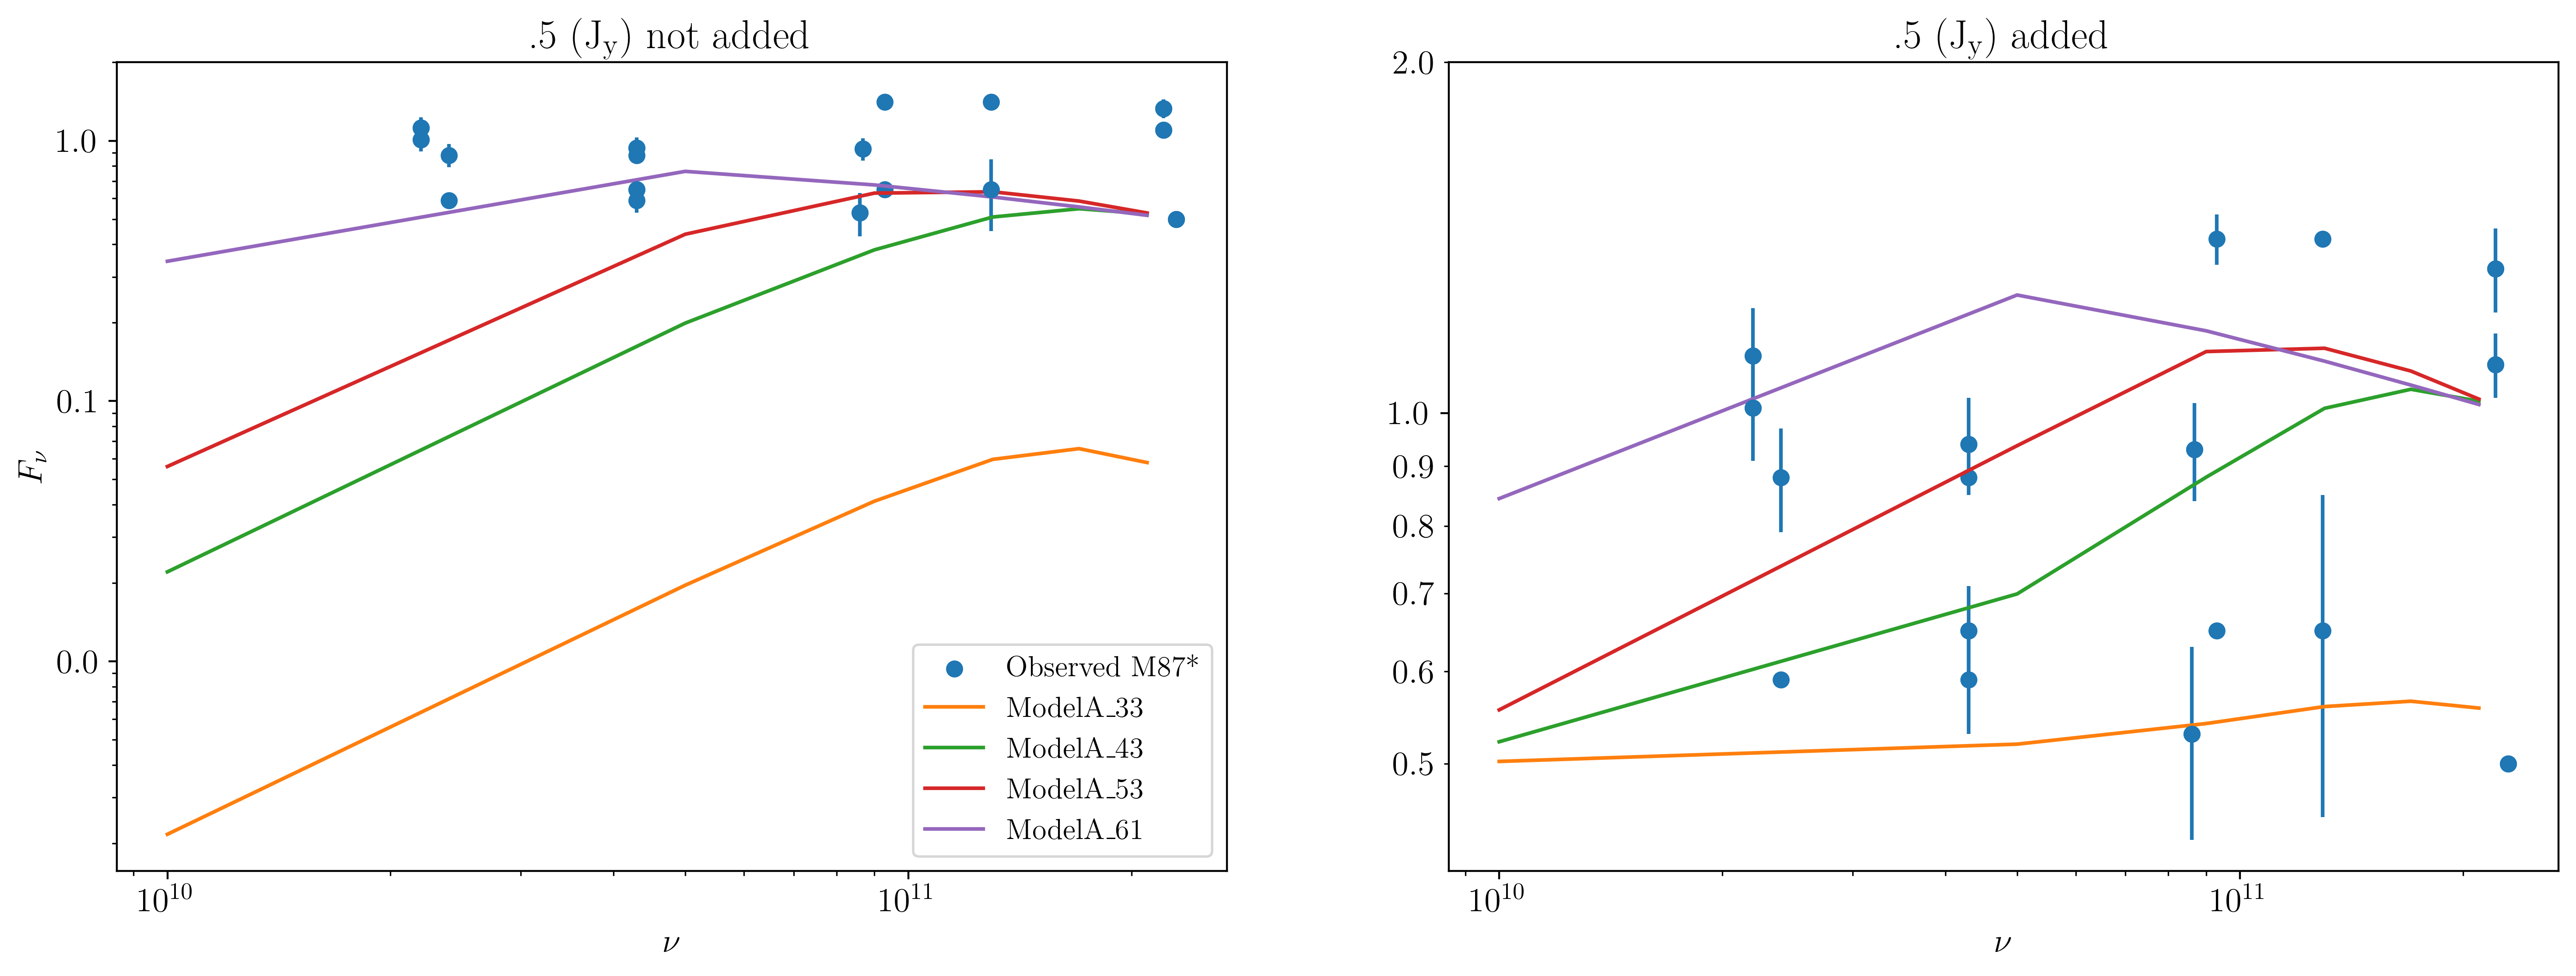

In [80]:
fig,(ax,ax1) = plt.subplots(1,2,dpi=400,figsize=[18,6])
ax.scatter(xGHZ,sortedyJansky,label="Observed M87*")
ax.errorbar(x,sortedyJansky, yerr=sortederrJansky, fmt="o")
ax.set_yscale("log")
ax.set_xscale("log")
plotModel("ModelA_33",ax,bigRun2,run2)
plotModel("ModelA_43",ax,bigRun2,run2)
# plotModel("ModelA_11",ax,bigRun2,run2)
ax.set_ylabel(R"$F_\nu$")
ax.set_xlabel(R"$\nu$")
# ax.yaxis.set_minor_formatter(ticker.FormatStrFormatter('%.1f'))
plotModel("ModelA_53",ax,bigRun2,run2)
plotModel("ModelA_61",ax,bigRun2,run2)

ax.yaxis.set_major_formatter(ticker.FormatStrFormatter("%.1f"))
ax.set_ylim([0,3e0])
# plotModel("ModelA_93",ax,bigRun2,run2)
ax.legend()

ax.set_title(R".5 ($\rm J_y$) not added")


ax1.scatter(xGHZ,sortedyJansky,label="Observed M87*")
ax1.errorbar(x,sortedyJansky, yerr=sortederrJansky, fmt="o")
plotModel("ModelA_33",ax1,bigRun2,run2,True)
plotModel("ModelA_43",ax1,bigRun2,run2,True)
plotModel("ModelA_53",ax1,bigRun2,run2,True)

plotModel("ModelA_61",ax1,bigRun2,run2,True)
ax1.set_yscale("log")
ax1.set_xscale("log")

ax1.set_xlabel(R"$\nu$")

ax1.yaxis.set_major_formatter(ticker.FormatStrFormatter("%.1f"))
ax1.yaxis.set_minor_formatter(ticker.FormatStrFormatter("%.1f"))
plt.savefig("DemoComp2.jpeg", dpi=400, bbox_inches='tight')

ax1.set_ylim([0,2e0])
ax.set_ylim([0,2e0])

ax1.set_title(R".5 ($\rm J_y$) added")


In [71]:
print(10**11.5)

316227766016.83795


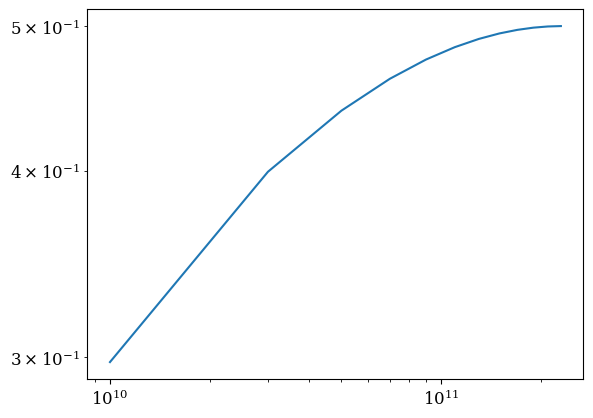

In [88]:
fig,ax = plt.subplots()
xvar = ModelA32["x_variable"]
ax.plot(xvar[xvar<=230e9],ModelA32["janksys_thick"][:,3][xvar<=230e9])

ax.set_yscale("log")
ax.set_xscale("log")
